In [1]:
import os, glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import Callback,EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import  classification_report

In [2]:
file_path = 'archive (2)/data/train'

In [3]:
name_class = os.listdir(file_path)
name_class

['benign', 'malignant']

In [4]:
filepaths = list(glob.glob(file_path+'/**/*.*'))

In [5]:
filepaths

['archive (2)/data/train\\benign\\100.jpg',
 'archive (2)/data/train\\benign\\1000.jpg',
 'archive (2)/data/train\\benign\\1001.jpg',
 'archive (2)/data/train\\benign\\1002.jpg',
 'archive (2)/data/train\\benign\\1004.jpg',
 'archive (2)/data/train\\benign\\1005.jpg',
 'archive (2)/data/train\\benign\\1007.jpg',
 'archive (2)/data/train\\benign\\1008.jpg',
 'archive (2)/data/train\\benign\\1009.jpg',
 'archive (2)/data/train\\benign\\101.jpg',
 'archive (2)/data/train\\benign\\1010.jpg',
 'archive (2)/data/train\\benign\\1011.jpg',
 'archive (2)/data/train\\benign\\1012.jpg',
 'archive (2)/data/train\\benign\\1014.jpg',
 'archive (2)/data/train\\benign\\1015.jpg',
 'archive (2)/data/train\\benign\\1016.jpg',
 'archive (2)/data/train\\benign\\1017.jpg',
 'archive (2)/data/train\\benign\\102.jpg',
 'archive (2)/data/train\\benign\\1020.jpg',
 'archive (2)/data/train\\benign\\1021.jpg',
 'archive (2)/data/train\\benign\\1022.jpg',
 'archive (2)/data/train\\benign\\1024.jpg',
 'archive (2)

In [6]:
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
labels

['benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',

In [7]:

filepath = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')
data = pd.concat([filepath, labels], axis=1)
data = data.sample(frac=1).reset_index(drop=True)
data.head(5)


,Filepath,Label
0,archive (2)/data/train\malignant\59.jpg,malignant
1,archive (2)/data/train\malignant\598.jpg,malignant
2,archive (2)/data/train\malignant\146.jpg,malignant
3,archive (2)/data/train\benign\1426.jpg,benign
4,archive (2)/data/train\benign\1439.jpg,benign


In [8]:
#balancing

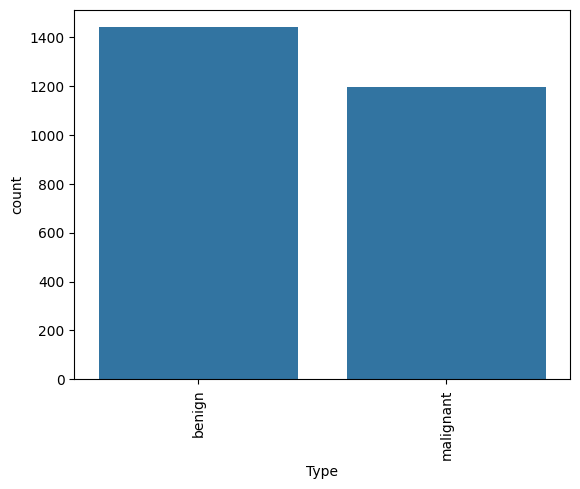

In [9]:
counts = data.Label.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Type')
plt.xticks(rotation=90);

In [10]:
#balance by deleting extra images (Augmentor API)
#augmentation 
#GAN

In [11]:
train, test = train_test_split(data, test_size=0.25, random_state=42)

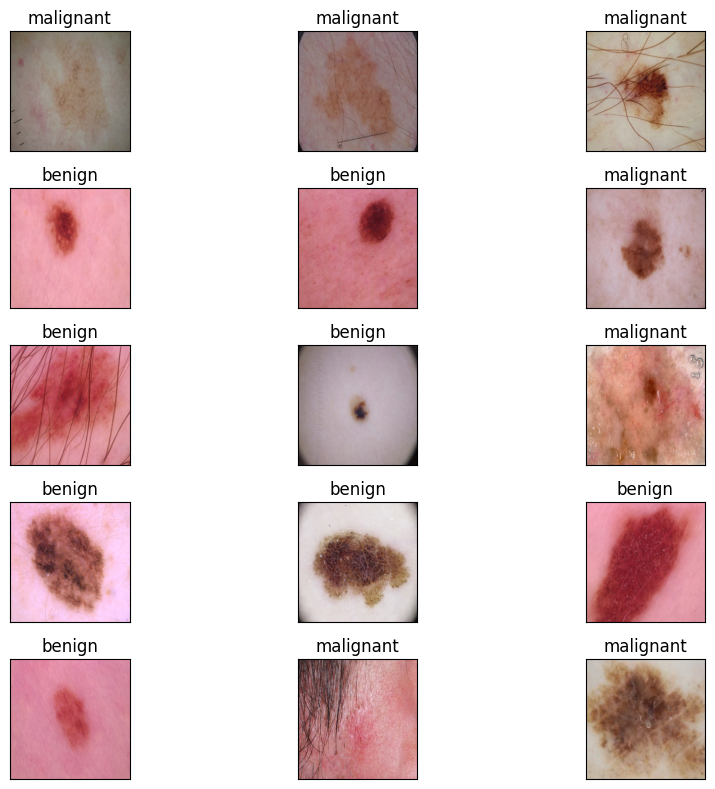

In [12]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10,8), subplot_kw={'xticks':[],'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data.Filepath[i]))
    ax.set_title(data.Label[i])
plt.tight_layout()
plt.show()

In [13]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [14]:
train_gen = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42
)
valid_gen = train_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42
)
test_gen = test_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 1977 validated image filenames belonging to 2 classes.
Found 660 validated image filenames belonging to 2 classes.
Found 660 validated image filenames belonging to 2 classes.


In [15]:
pretrained_model = ResNet50(
    input_shape=(100,100, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 383s 4us/step


In [16]:
inputs = pretrained_model.input

x = Dense(128, activation='relu')(pretrained_model.output)
x = Dense(128, activation='relu')(x)

outputs = Dense(2, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

In [17]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [18]:
my_callbacks  = [EarlyStopping(monitor='val_accuracy',
                              min_delta=0,
                              patience=2,
                              mode='auto')]

In [ ]:
history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=100
)

Epoch 1/100


C:\Users\priya\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


62/62 ━━━━━━━━━━━━━━━━━━━━ 70s 877ms/step - accuracy: 0.6669 - loss: 0.7340 - val_accuracy: 0.8394 - val_loss: 0.3340
Epoch 2/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 51s 818ms/step - accuracy: 0.8584 - loss: 0.3225 - val_accuracy: 0.8545 - val_loss: 0.3326
Epoch 3/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 51s 813ms/step - accuracy: 0.8806 - loss: 0.2774 - val_accuracy: 0.8303 - val_loss: 0.3706
Epoch 4/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 51s 818ms/step - accuracy: 0.8947 - loss: 0.2231 - val_accuracy: 0.8742 - val_loss: 0.2857
Epoch 5/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 51s 807ms/step - accuracy: 0.9224 - loss: 0.1757 - val_accuracy: 0.8591 - val_loss: 0.3344
Epoch 6/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 51s 810ms/step - accuracy: 0.9385 - loss: 0.1444 - val_accuracy: 0.8803 - val_loss: 0.3263
Epoch 7/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 51s 810ms/step - accuracy: 0.9421 - loss: 0.1299 - val_accuracy: 0.8848 - val_loss: 0.2986
Epoch 8/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 51s 816ms/step - accuracy: 0.9638 - loss: 0.0999 - val_accuracy

In [ ]:
model.save("model_resnet50.h5")  

In [ ]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [ ]:
results = model.evaluate(test_gen, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

In [ ]:
# Predict the label of the test_gen
pred = model.predict(test_gen)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

In [ ]:
y_test = list(test.Label)
print(classification_report(y_test, pred))

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test.Filepath.iloc[i]))
    ax.set_title(f"True: {test.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

In [ ]:
import cv2
import numpy as np
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input

img_path = 'images/real/1.jpg'

#img = image.load_img(img_path, target_size=(224, 224))
#x = img.img_to_array(img)

img = cv2.imread(img_path)
img = cv2.resize(img, (100, 100))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)
result = model.predict(x)
print((result*100).astype('int'))

#print('Input image shape:', x.shape)

#my_image = imread(img_path)
#imshow(my_image)


In [ ]:
from tensorflow.keras.models import load_model
loaded_model_imageNet = load_model("model_resnet50.h5")
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

In [ ]:
import cv2
import numpy as np
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input

img_path = '16.jpg'

#img = image.load_img(img_path, target_size=(224, 224))
#x = img.img_to_array(img)

img = cv2.imread(img_path)
img = cv2.resize(img, (100, 100))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)
result = loaded_model_imageNet.predict(x)
print((result*100).astype('int'))

#print('Input image shape:', x.shape)

#my_image = imread(img_path)
#imshow(my_image)


In [ ]:
p=list((result*100).astype('int'))
pp=list(p[0])
print(pp)

In [ ]:
print("Largest element is:", max(pp))

In [ ]:
index = pp.index(max(pp))

In [ ]:
name_class=['benign', 'Malignant']

In [ ]:
name_class[index]

In [ ]:
plt.imread(img_path)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(img_path)
imgplot = plt.imshow(img)
plt.title(name_class[index])
plt.show()